# 附录C – 多目标优化问题A求解程序

In [ ]:
# -*- coding: utf-8 -*-
'''
论文题目：基于深度学习的PSA过程优化与控制
作    者：余秀鑫
单    位：天津大学化工学院
时    间：2022.04.12
'''

In [1]:
# -*- coding: utf-8 -*-
import geatpy as ea  # import geatpy
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="ticks", font='Times New Roman', font_scale=1.4)

# 代理模型函数构建

## 输入scaler

In [9]:
x_train = np.load("../results_of_sample1000/DL/Input.npy")
scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(x_train)

## H2-Purity

In [12]:
H2_Purity_train = np.load("../results_of_sample1000/DL/H2_Purity.npy")
scaler_H2_Purity = MinMaxScaler(feature_range=(0, 1)).fit(H2_Purity_train)
H2_Purity_M = tf.keras.models.load_model(
    "../MLP_training/Scalar/model_saved/H2_Purity")

2022-04-12 08:32:44.366269: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
def H2_Purity_f(Inlet):
    x_test_std = scaler_x.transform(Inlet)
    y_pred_std = H2_Purity_M.predict(x_test_std)
    y_pred = scaler_H2_Purity.inverse_transform(y_pred_std)
    return y_pred

## H2-Recovery

In [14]:
H2_Recovery_train = np.load("../results_of_sample1000/DL/H2_Recovery.npy")
scaler_H2_Recovery = MinMaxScaler(feature_range=(0, 1)).fit(H2_Recovery_train)
H2_Recovery_M = tf.keras.models.load_model(
    "../MLP_training/Scalar/model_saved/H2_Recovery")

In [15]:
def H2_Recovery_f(Inlet):
    x_test_std = scaler_x.transform(Inlet)
    y_pred_std = H2_Recovery_M.predict(x_test_std)
    y_pred = scaler_H2_Recovery.inverse_transform(y_pred_std)
    return y_pred

## H2-Productivity

In [16]:
H2_Productivity_train = np.load(
    "../results_of_sample1000/DL/H2_Productivity.npy")
scaler_H2_Productivity = MinMaxScaler(
    feature_range=(0, 1)).fit(H2_Productivity_train)
H2_Productivity_M = tf.keras.models.load_model(
    "../MLP_training/Scalar/model_saved/H2_Productivity")

In [17]:
def H2_Productivity_f(Inlet):
    x_test_std = scaler_x.transform(Inlet)
    y_pred_std = H2_Productivity_M.predict(x_test_std)
    y_pred = scaler_H2_Productivity.inverse_transform(y_pred_std)
    return y_pred

## CO2-Purity

In [18]:
CO2_Purity_train = np.load("../results_of_sample1000/DL/CO2_Purity.npy")
scaler_CO2_Purity = MinMaxScaler(feature_range=(0, 1)).fit(CO2_Purity_train)
CO2_Purity_M = tf.keras.models.load_model(
    "../MLP_training/Scalar/model_saved/CO2_Purity")

In [19]:
def CO2_Purity_f(Inlet):
    x_test_std = scaler_x.transform(Inlet)
    y_pred_std = CO2_Purity_M.predict(x_test_std)
    y_pred = scaler_CO2_Purity.inverse_transform(y_pred_std)
    return y_pred

## CO2-Recovery

In [20]:
CO2_Recovery_train = np.load("../results_of_sample1000/DL/CO2_Recovery.npy")
scaler_CO2_Recovery = MinMaxScaler(feature_range=(0, 1)).fit(CO2_Recovery_train)
CO2_Recovery_M = tf.keras.models.load_model(
    "../MLP_training/Scalar/model_saved/CO2_Recovery")

In [21]:
def CO2_Recovery_f(Inlet):
    x_test_std = scaler_x.transform(Inlet)
    y_pred_std = CO2_Recovery_M.predict(x_test_std)
    y_pred = scaler_CO2_Recovery.inverse_transform(y_pred_std)
    return y_pred

## CO2-Productivity

In [22]:
CO2_Productivity_train = np.load(
    "../results_of_sample1000/DL/CO2_Productivity.npy")
scaler_CO2_Productivity = MinMaxScaler(
    feature_range=(0, 1)).fit(CO2_Productivity_train)
CO2_Productivity_M = tf.keras.models.load_model(
    "../MLP_training/Scalar/model_saved/CO2_Productivity")

In [23]:
def CO2_Productivity_f(Inlet):
    x_test_std = scaler_x.transform(Inlet)
    y_pred_std = CO2_Productivity_M.predict(x_test_std)
    y_pred = scaler_CO2_Productivity.inverse_transform(y_pred_std)
    return y_pred

# 构造Problem

In [24]:
class MyProblem(ea.Problem):  # 继承Problem父类
    def __init__(self):
        M = 2
        name = "MyProblem"  # 初始化name（函数名称，可以随意设置）
        Dim = 7  # 初始化Dim（决策变量维数）
        maxormins = [-1] * M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        varTypes = [1] * Dim  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [10, 20, 20, 20, 20, 200000, 10]  # 决策变量下界
        ub = [100, 150, 150, 200, 150, 2100000, 40]  # 决策变量上界
        lbin = [1] * Dim  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1] * Dim  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub,
                            lbin, ubin)

    def aimFunc(self, pop):  # 目标函数，pop是种群对象
        Vars = pop.Phen  # 得到决策变量矩阵
        H2_Purity = H2_Purity_f(Vars)
        H2_Recovery = H2_Recovery_f(Vars)
        # 利用可行性法则处理约束条件，生成种群个体违反约束程度矩阵
        pop.CV = np.hstack([85 - CO2_Recovery_f(Vars),95 - CO2_Purity_f(Vars)])
        # 把求得的目标函数值赋值给种群pop的ObjV
        pop.ObjV = np.hstack([H2_Purity, H2_Recovery])

# 执行优化

## 实例化问题对象

In [25]:
problem = MyProblem()  # 生成问题对象

## 种群设置

In [26]:
Encoding = 'RI'  # 编码方式
NIND = 100  # 种群规模
Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges,
                  problem.borders)  # 创建区域描述器
population = ea.Population(Encoding, Field,
                           NIND)  # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）

## 算法参数设置

In [18]:
def outFunc(alg, pop):  # alg 和 pop为outFunc的固定输入参数，分别为算法对象和每次迭代的种群对象。
    print('第 %d 代' % alg.currentGen)

In [19]:
myAlgorithm = ea.moea_NSGA2_templet(problem, population)  # 实例化一个算法模板对象
myAlgorithm.mutOper.Pm = 0.2  # 修改变异算子的变异概率
myAlgorithm.recOper.XOVR = 0.9  # 修改交叉算子的交叉概率
myAlgorithm.MAXGEN = 1000  # 最大进化代数
myAlgorithm.logTras = 1  # 设置每多少代记录日志，若设置成0则表示不记录日志
myAlgorithm.verbose = False  # 设置是否打印输出日志信息
myAlgorithm.drawing = 0  # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制目标空间过程动画；3：绘制决策空间过程动画）
#myAlgorithm.outFunc = outFunc

## 调用算法进行种群进化
调用run执行算法模板，得到帕累托最优解集NDSet以及最后一代种群。NDSet是一个种群类Population的对象。NDSet.ObjV为最优解个体的目标函数值；NDSet.Phen为对应的决策变量值。

In [20]:
[NDSet, population] = myAlgorithm.run()  # 执行算法模板，得到非支配种群以及最后一代种群
NDSet.save()  # 把非支配种群的信息保存到文件中

C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Leo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encoun

## 输出结果

In [21]:
print('用时：%f 秒' % myAlgorithm.passTime)
print('评价次数：%d 次' % myAlgorithm.evalsNum)
print('非支配个体数：%d 个' % NDSet.sizes) if NDSet.sizes != 0 else print('没有找到可行解！')

用时：113.431557 秒
评价次数：100000 次
非支配个体数：100 个


## 帕累托前沿

In [22]:
Pareto_Frontier = pd.DataFrame(population.ObjV,columns =['H2 Purity','H2 Recovery'])

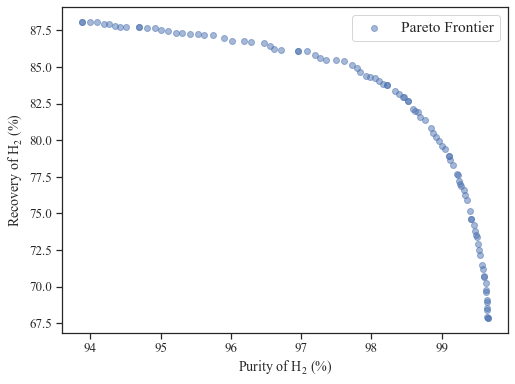

In [29]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False 

plt.figure(figsize=(8, 6))
plt.scatter(Pareto_Frontier['H2 Purity'], Pareto_Frontier['H2 Recovery'],alpha=0.5,label = 'Pareto Frontier')
plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Purity of $\mathregular{H_2}$ (%)",fontsize=14)
plt.ylabel("Recovery of $\mathregular{H_2}$ (%)",fontsize=14)

plt.savefig('Pareto_Frontier_H2.png',dpi=300,bbox_inches='tight' )

# 结果保存

In [33]:
Pareto_Frontier_H2 = pd.concat([PF_Phen,Pareto_Frontier],axis=1)

In [34]:
writer = pd.ExcelWriter('Pareto_Frontier_H2.xlsx')
Pareto_Frontier_H2.to_excel(writer, 'Pareto_Frontier_H2')
writer.save()